In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# pd.reset_option('display.max_rows')


# Importing the dataset
X_dataset = pd.read_csv('X_delta_visit_ones.csv')
Y_RNFL = pd.read_csv('Y_visit_threes_RNFL.csv')
Y_GCA = pd.read_csv('Y_visit_threes_GCA.csv')
Y_VFI = pd.read_csv('Y_visit_threes_VFI.csv')
Y_MD = pd.read_csv('Y_visit_threes_MD.csv')


In [2]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder

#label encoding dx: 3 total
labelencoder_X_1 = LabelEncoder()
X_dataset.iloc[:, 1] = labelencoder_X_1.fit_transform(X_dataset.iloc[:, 1])

#label encoding gender: 2 total
labelencoder_X_2 = LabelEncoder()
X_dataset.iloc[:, 2] = labelencoder_X_2.fit_transform(X_dataset.iloc[:, 2])

#label encoding race: 3 total
labelencoder_X_3 = LabelEncoder()
X_dataset.iloc[:, 3] = labelencoder_X_3.fit_transform(X_dataset.iloc[:, 3])

In [3]:
print(X_dataset['primary_dx'].value_counts())
print(X_dataset['gender'].value_counts())
print(X_dataset['race'].value_counts())

0    2274
1     951
2      13
Name: primary_dx, dtype: int64
0    1877
1    1361
Name: gender, dtype: int64
2    2462
1     618
0     158
Name: race, dtype: int64


In [4]:
X_dataset = pd.get_dummies(X_dataset, columns=['primary_dx', 'race'], drop_first=True)

In [5]:
#primary_dx_1 = glaucoma suspect
#primary_dx_2 = OHTN
#race_1 = black
#race_2 = white

X_dataset.rename(columns={'race_1':'black', 'race_2':'white', 'primary_dx_1':'GS','primary_dx_2':'OHTN'}, inplace=True)

X_dataset = X_dataset.iloc[:, 1:]
Y_RNFL = Y_RNFL.iloc[:, 1:]
Y_VFI = Y_VFI.iloc[:, 1:]
Y_MD = Y_MD.iloc[:, 1:]
Y_GCA = Y_GCA.iloc[:, 1:]

listing = pd.Series(X_dataset.columns.values)
listing

0                 gender
1           avg_cd_ratio
2            gca_average
3            gca_tempsup
4                gca_sup
5             gca_nassup
6             gca_nasinf
7                gca_inf
8            gca_tempinf
9           rnfl_average
10          rnfl_tempsup
11              rnfl_sup
12           rnfl_nassup
13           rnfl_nasinf
14              rnfl_inf
15          rnfl_tempinf
16                    md
17                  p_md
18                   psd
19                 p_psd
20                   vfi
21                   age
22    avg_cd_ratio_delta
23     gca_average_delta
24     gca_tempsup_delta
25         gca_sup_delta
26      gca_nassup_delta
27      gca_nasinf_delta
28         gca_inf_delta
29     gca_tempinf_delta
30    rnfl_average_delta
31    rnfl_tempsup_delta
32        rnfl_sup_delta
33     rnfl_nassup_delta
34     rnfl_nasinf_delta
35        rnfl_inf_delta
36    rnfl_tempinf_delta
37              md_delta
38            p_md_delta
39             psd_delta


In [6]:
# # Splitting the dataset into the Training set and Test set
# from sklearn.model_selection import train_test_split
# X_train_RNFL, X_test_RNFL, y_train_RNFL, y_test_RNFL = train_test_split(X_dataset, Y_RNFL, test_size = 0.2, random_state = 200)
# X_train_VFI, X_test_VFI, y_train_VFI, y_test_VFI = train_test_split(X_dataset, Y_VFI, test_size = 0.2, random_state = 200)
# X_train_MD, X_test_MD, y_train_MD, y_test_MD = train_test_split(X_dataset, Y_MD, test_size = 0.2, random_state = 200)
# X_train_GCA, X_test_GCA, y_train_GCA, y_test_GCA = train_test_split(X_dataset, Y_GCA, test_size = 0.2, random_state = 200)

# # Feature Scaling
# from sklearn.preprocessing import StandardScaler
# sc_RNFL = StandardScaler()
# X_train_RNFL = sc_RNFL.fit_transform(X_train_RNFL)
# X_test_RNFL = sc_RNFL.transform(X_test_RNFL)

# sc_VFI = StandardScaler()
# X_train_VFI = sc_VFI.fit_transform(X_train_VFI)
# X_test_VFI = sc_VFI.transform(X_test_VFI)

# sc_MD = StandardScaler()
# X_train_MD = sc_MD.fit_transform(X_train_MD)
# X_test_MD = sc_MD.transform(X_test_MD)

# sc_GCA = StandardScaler()
# X_train_GCA = sc_GCA.fit_transform(X_train_GCA)
# X_test_GCA = sc_GCA.transform(X_test_GCA)



In [7]:
def ann_model():
    # Initialising the ANN
    classifier = Sequential()
    
    #Batch normalization
#     classifier.add(BatchNormalization(axis = 1))
    
    # Adding the input layer and the first hidden layer
    classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'linear', input_dim = 46))
    classifier.add(LeakyReLU(alpha = 0.001))

    # Adding the second hidden layer
    classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'linear'))
    classifier.add(LeakyReLU(alpha = 0.001))

    # Adding the second hidden layer
    classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'linear'))
    classifier.add(LeakyReLU(alpha = 0.001))

    # Adding the second hidden layer
    classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'linear'))
    classifier.add(LeakyReLU(alpha = 0.001))

    # Adding the second hidden layer
    classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'linear'))
    classifier.add(LeakyReLU(alpha = 0.001))

    #dropout layer
    classifier.add(Dropout(0.2))
    
    # Adding the output layer
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'linear'))
    classifier.add(LeakyReLU(alpha = 0.1))

    # # Adding the input layer and the first hidden layer
    # classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 46))

    # # Adding the second hidden layer
    # classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))

    # # Adding the third hidden layer
    # classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))

    # # Adding the third hidden layer
    # classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))

    # # # Adding the third hidden layer
    # # classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
    
    # # # Adding the third hidden layer
    # # classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))

    # # # Adding the third hidden layer
    # # classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))

    # # Adding the third hidden layer
    # classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))

    # # Adding the output layer
    # classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'relu'))
    
    # Compiling the ANN
    classifier.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['MAE', 'accuracy'])
    
    return classifier

In [8]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers.advanced_activations import LeakyReLU
from keras.layers import BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import ModelCheckpoint, EarlyStopping

def ANN_baseline(X, y, name):
#     scaler = MinMaxScaler()
#     X = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 200)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 200)
    y_train = y_train.ravel()
    y_test = y_test.ravel()
    y_val = y_val.ravel()
    model = ann_model()

    weight_path="ANN_Interval_best_{}.hdf5".format(name)
    checkpoint = ModelCheckpoint(weight_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
    early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
    callbacks_list = [checkpoint, early_stop]
        
    #fit the model
    history = model.fit(X_train, y_train, epochs=500, validation_data=(X_val, y_val), shuffle=False, callbacks=callbacks_list, verbose=1)
    
    # plot train and validation loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model train vs validation loss for {}'.format(name))
    plt.ylabel('loss')
    plt.xlabel('epoch')
#     plt.ylim(top = y_limit)
    plt.legend(['train', 'validation'], loc='upper right')
    plt.savefig('loss_plot_{}.png'.format(name), dpi = 300)
    plt.show()
    
    
    model.load_weights(weight_path)
    y_pred = model.predict(X_test)
    y_pred = y_pred.flatten()
    y_pred = y_pred.tolist()
  
    dictionary_DF = {'predicted':y_pred, 'actual':y_test}
    data = pd.DataFrame(dictionary_DF)
    data.to_csv('Predicted_vs_Actual_of_{}'.format(name))
    
    mean_absolute_error = abs(data['predicted']-data['actual'])
    mean_absolute_error = mean_absolute_error.describe()
    mean_absolute_error.to_csv('MAE_of_{}_Predicted_vs_Actual'.format(name))
    
    return model

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [9]:
X = np.array(X_dataset)
y_MD = np.array(Y_MD)
y_GCA = np.array(Y_GCA)
y_VFI = np.array(Y_VFI)
y_RNFL = np.array(Y_RNFL)
X.shape


(3238, 46)

### ANN for RNFL

Train on 2072 samples, validate on 518 samples
Epoch 1/500
2072/2072 [==============================] - 1s 320us/step - loss: 0.3083 - mean_absolute_error: 0.4406 - acc: 9.6525e-04 - val_loss: 0.1394 - val_mean_absolute_error: 0.3029 - val_acc: 0.0019

Epoch 00001: val_loss improved from inf to 0.13940, saving model to ANN_Interval_best_MD.hdf5
Epoch 2/500
2072/2072 [==============================] - 0s 58us/step - loss: 0.1271 - mean_absolute_error: 0.2929 - acc: 9.6525e-04 - val_loss: 0.1062 - val_mean_absolute_error: 0.2620 - val_acc: 0.0019

Epoch 00002: val_loss improved from 0.13940 to 0.10615, saving model to ANN_Interval_best_MD.hdf5
Epoch 3/500
2072/2072 [==============================] - 0s 66us/step - loss: 0.0918 - mean_absolute_error: 0.2376 - acc: 9.6525e-04 - val_loss: 0.0605 - val_mean_absolute_error: 0.1784 - val_acc: 0.0019

Epoch 00003: val_loss improved from 0.10615 to 0.06045, saving model to ANN_Interval_best_MD.hdf5
Epoch 4/500
2072/2072 [========================

2072/2072 [==============================] - 0s 62us/step - loss: 0.0460 - mean_absolute_error: 0.1546 - acc: 9.6525e-04 - val_loss: 0.0414 - val_mean_absolute_error: 0.1493 - val_acc: 0.0019

Epoch 00058: val_loss improved from 0.04155 to 0.04139, saving model to ANN_Interval_best_MD.hdf5
Epoch 59/500
2072/2072 [==============================] - 0s 48us/step - loss: 0.0462 - mean_absolute_error: 0.1547 - acc: 9.6525e-04 - val_loss: 0.0413 - val_mean_absolute_error: 0.1482 - val_acc: 0.0019

Epoch 00059: val_loss improved from 0.04139 to 0.04126, saving model to ANN_Interval_best_MD.hdf5
Epoch 60/500
2072/2072 [==============================] - 0s 48us/step - loss: 0.0459 - mean_absolute_error: 0.1540 - acc: 9.6525e-04 - val_loss: 0.0409 - val_mean_absolute_error: 0.1475 - val_acc: 0.0019

Epoch 00060: val_loss improved from 0.04126 to 0.04091, saving model to ANN_Interval_best_MD.hdf5
Epoch 61/500
2072/2072 [==============================] - 0s 61us/step - loss: 0.0457 - mean_absolute

2072/2072 [==============================] - 0s 49us/step - loss: 0.0416 - mean_absolute_error: 0.1455 - acc: 9.6525e-04 - val_loss: 0.0370 - val_mean_absolute_error: 0.1409 - val_acc: 0.0019

Epoch 00116: val_loss did not improve from 0.03686
Epoch 117/500
2072/2072 [==============================] - 0s 67us/step - loss: 0.0414 - mean_absolute_error: 0.1453 - acc: 9.6525e-04 - val_loss: 0.0372 - val_mean_absolute_error: 0.1426 - val_acc: 0.0019

Epoch 00117: val_loss did not improve from 0.03686
Epoch 118/500
2072/2072 [==============================] - 0s 58us/step - loss: 0.0414 - mean_absolute_error: 0.1454 - acc: 9.6525e-04 - val_loss: 0.0377 - val_mean_absolute_error: 0.1417 - val_acc: 0.0019

Epoch 00118: val_loss did not improve from 0.03686
Epoch 119/500
2072/2072 [==============================] - 0s 47us/step - loss: 0.0415 - mean_absolute_error: 0.1452 - acc: 9.6525e-04 - val_loss: 0.0378 - val_mean_absolute_error: 0.1436 - val_acc: 0.0019

Epoch 00119: val_loss did not imp


Epoch 00178: val_loss did not improve from 0.03630
Epoch 179/500
2072/2072 [==============================] - 0s 50us/step - loss: 0.0403 - mean_absolute_error: 0.1429 - acc: 9.6525e-04 - val_loss: 0.0383 - val_mean_absolute_error: 0.1443 - val_acc: 0.0019

Epoch 00179: val_loss did not improve from 0.03630
Epoch 180/500
2072/2072 [==============================] - 0s 48us/step - loss: 0.0400 - mean_absolute_error: 0.1421 - acc: 9.6525e-04 - val_loss: 0.0383 - val_mean_absolute_error: 0.1443 - val_acc: 0.0019

Epoch 00180: val_loss did not improve from 0.03630
Epoch 181/500
2072/2072 [==============================] - 0s 54us/step - loss: 0.0397 - mean_absolute_error: 0.1418 - acc: 9.6525e-04 - val_loss: 0.0363 - val_mean_absolute_error: 0.1388 - val_acc: 0.0019

Epoch 00181: val_loss improved from 0.03630 to 0.03626, saving model to ANN_Interval_best_MD.hdf5
Epoch 182/500
2072/2072 [==============================] - 0s 47us/step - loss: 0.0409 - mean_absolute_error: 0.1445 - acc: 9.6


Epoch 00241: val_loss did not improve from 0.03600
Epoch 242/500
2072/2072 [==============================] - 0s 56us/step - loss: 0.0375 - mean_absolute_error: 0.1377 - acc: 9.6525e-04 - val_loss: 0.0411 - val_mean_absolute_error: 0.1508 - val_acc: 0.0019

Epoch 00242: val_loss did not improve from 0.03600
Epoch 243/500
2072/2072 [==============================] - 0s 51us/step - loss: 0.0374 - mean_absolute_error: 0.1365 - acc: 9.6525e-04 - val_loss: 0.0370 - val_mean_absolute_error: 0.1408 - val_acc: 0.0019

Epoch 00243: val_loss did not improve from 0.03600
Epoch 244/500
2072/2072 [==============================] - 0s 48us/step - loss: 0.0377 - mean_absolute_error: 0.1379 - acc: 9.6525e-04 - val_loss: 0.0358 - val_mean_absolute_error: 0.1386 - val_acc: 0.0019

Epoch 00244: val_loss improved from 0.03600 to 0.03579, saving model to ANN_Interval_best_MD.hdf5
Epoch 245/500
2072/2072 [==============================] - 0s 57us/step - loss: 0.0380 - mean_absolute_error: 0.1386 - acc: 9.6


Epoch 00304: val_loss did not improve from 0.03563
Epoch 305/500
2072/2072 [==============================] - 0s 48us/step - loss: 0.0380 - mean_absolute_error: 0.1392 - acc: 9.6525e-04 - val_loss: 0.0393 - val_mean_absolute_error: 0.1447 - val_acc: 0.0019

Epoch 00305: val_loss did not improve from 0.03563
Epoch 306/500
2072/2072 [==============================] - 0s 57us/step - loss: 0.0370 - mean_absolute_error: 0.1360 - acc: 9.6525e-04 - val_loss: 0.0401 - val_mean_absolute_error: 0.1469 - val_acc: 0.0019

Epoch 00306: val_loss did not improve from 0.03563
Epoch 307/500
2072/2072 [==============================] - 0s 57us/step - loss: 0.0364 - mean_absolute_error: 0.1344 - acc: 9.6525e-04 - val_loss: 0.0363 - val_mean_absolute_error: 0.1384 - val_acc: 0.0019

Epoch 00307: val_loss did not improve from 0.03563
Epoch 308/500
2072/2072 [==============================] - 0s 49us/step - loss: 0.0363 - mean_absolute_error: 0.1344 - acc: 9.6525e-04 - val_loss: 0.0383 - val_mean_absolute_


Epoch 00336: val_loss did not improve from 0.03563
Epoch 337/500
2072/2072 [==============================] - 0s 50us/step - loss: 0.0495 - mean_absolute_error: 0.1608 - acc: 9.6525e-04 - val_loss: 0.0402 - val_mean_absolute_error: 0.1450 - val_acc: 0.0019

Epoch 00337: val_loss did not improve from 0.03563
Epoch 338/500
2072/2072 [==============================] - 0s 72us/step - loss: 0.0442 - mean_absolute_error: 0.1510 - acc: 9.6525e-04 - val_loss: 0.0387 - val_mean_absolute_error: 0.1433 - val_acc: 0.0019

Epoch 00338: val_loss did not improve from 0.03563
Epoch 339/500
2072/2072 [==============================] - 0s 67us/step - loss: 0.0447 - mean_absolute_error: 0.1516 - acc: 9.6525e-04 - val_loss: 0.0396 - val_mean_absolute_error: 0.1450 - val_acc: 0.0019

Epoch 00339: val_loss did not improve from 0.03563
Epoch 340/500
2072/2072 [==============================] - 0s 49us/step - loss: 0.0433 - mean_absolute_error: 0.1485 - acc: 9.6525e-04 - val_loss: 0.0432 - val_mean_absolute_

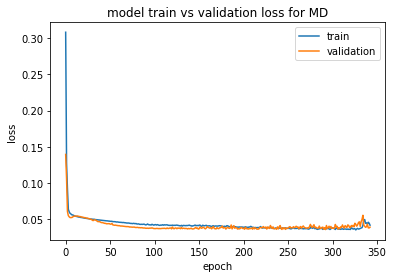

In [10]:
ANN_baseline(X, y_MD, 'MD')

Train on 2072 samples, validate on 518 samples
Epoch 1/500
2072/2072 [==============================] - 1s 317us/step - loss: 4065.3045 - mean_absolute_error: 57.4866 - acc: 0.0039 - val_loss: 170.6302 - val_mean_absolute_error: 10.8866 - val_acc: 0.0290

Epoch 00001: val_loss improved from inf to 170.63021, saving model to ANN_Interval_best_cRNFL.hdf5
Epoch 2/500
2072/2072 [==============================] - 0s 56us/step - loss: 101.5144 - mean_absolute_error: 7.7217 - acc: 0.0410 - val_loss: 61.5753 - val_mean_absolute_error: 6.0368 - val_acc: 0.0598

Epoch 00002: val_loss improved from 170.63021 to 61.57529, saving model to ANN_Interval_best_cRNFL.hdf5
Epoch 3/500
2072/2072 [==============================] - 0s 58us/step - loss: 69.8286 - mean_absolute_error: 6.3521 - acc: 0.0589 - val_loss: 60.6561 - val_mean_absolute_error: 5.9412 - val_acc: 0.0714

Epoch 00003: val_loss improved from 61.57529 to 60.65615, saving model to ANN_Interval_best_cRNFL.hdf5
Epoch 4/500
2072/2072 [========


Epoch 00027: val_loss improved from 12.66003 to 12.63791, saving model to ANN_Interval_best_cRNFL.hdf5
Epoch 28/500
2072/2072 [==============================] - 0s 48us/step - loss: 20.5189 - mean_absolute_error: 3.0524 - acc: 0.1125 - val_loss: 12.6158 - val_mean_absolute_error: 2.6787 - val_acc: 0.1236

Epoch 00028: val_loss improved from 12.63791 to 12.61577, saving model to ANN_Interval_best_cRNFL.hdf5
Epoch 29/500
2072/2072 [==============================] - 0s 63us/step - loss: 20.3990 - mean_absolute_error: 3.0375 - acc: 0.1134 - val_loss: 12.5988 - val_mean_absolute_error: 2.6771 - val_acc: 0.1178

Epoch 00029: val_loss improved from 12.61577 to 12.59883, saving model to ANN_Interval_best_cRNFL.hdf5
Epoch 30/500
2072/2072 [==============================] - 0s 56us/step - loss: 20.2988 - mean_absolute_error: 3.0246 - acc: 0.1139 - val_loss: 12.5733 - val_mean_absolute_error: 2.6749 - val_acc: 0.1139

Epoch 00030: val_loss improved from 12.59883 to 12.57334, saving model to ANN_

2072/2072 [==============================] - 0s 57us/step - loss: 19.5470 - mean_absolute_error: 2.9347 - acc: 0.1216 - val_loss: 12.4391 - val_mean_absolute_error: 2.6624 - val_acc: 0.1120

Epoch 00056: val_loss did not improve from 12.43453
Epoch 57/500
2072/2072 [==============================] - 0s 64us/step - loss: 19.5365 - mean_absolute_error: 2.9345 - acc: 0.1211 - val_loss: 12.4413 - val_mean_absolute_error: 2.6630 - val_acc: 0.1100

Epoch 00057: val_loss did not improve from 12.43453
Epoch 58/500
2072/2072 [==============================] - 0s 50us/step - loss: 19.5251 - mean_absolute_error: 2.9339 - acc: 0.1226 - val_loss: 12.4208 - val_mean_absolute_error: 2.6601 - val_acc: 0.1120

Epoch 00058: val_loss improved from 12.43453 to 12.42082, saving model to ANN_Interval_best_cRNFL.hdf5
Epoch 59/500
2072/2072 [==============================] - 0s 53us/step - loss: 19.5187 - mean_absolute_error: 2.9343 - acc: 0.1221 - val_loss: 12.4397 - val_mean_absolute_error: 2.6634 - val_acc


Epoch 00087: val_loss did not improve from 12.41941
Epoch 88/500
2072/2072 [==============================] - 0s 102us/step - loss: 19.1329 - mean_absolute_error: 2.9199 - acc: 0.1226 - val_loss: 12.4559 - val_mean_absolute_error: 2.6779 - val_acc: 0.1178

Epoch 00088: val_loss did not improve from 12.41941
Epoch 89/500
2072/2072 [==============================] - 0s 92us/step - loss: 19.1196 - mean_absolute_error: 2.9182 - acc: 0.1250 - val_loss: 12.4516 - val_mean_absolute_error: 2.6776 - val_acc: 0.1158

Epoch 00089: val_loss did not improve from 12.41941
Epoch 90/500
2072/2072 [==============================] - 0s 87us/step - loss: 19.1023 - mean_absolute_error: 2.9179 - acc: 0.1240 - val_loss: 12.4446 - val_mean_absolute_error: 2.6770 - val_acc: 0.1158

Epoch 00090: val_loss did not improve from 12.41941
Epoch 91/500
2072/2072 [==============================] - 0s 78us/step - loss: 19.0892 - mean_absolute_error: 2.9173 - acc: 0.1236 - val_loss: 12.4307 - val_mean_absolute_error: 

2072/2072 [==============================] - 0s 97us/step - loss: 18.3680 - mean_absolute_error: 2.8890 - acc: 0.1289 - val_loss: 12.2757 - val_mean_absolute_error: 2.6707 - val_acc: 0.1178

Epoch 00151: val_loss did not improve from 12.18919
Epoch 152/500
2072/2072 [==============================] - 0s 95us/step - loss: 18.3557 - mean_absolute_error: 2.8884 - acc: 0.1269 - val_loss: 12.2520 - val_mean_absolute_error: 2.6671 - val_acc: 0.1197

Epoch 00152: val_loss did not improve from 12.18919
Epoch 153/500
2072/2072 [==============================] - 0s 89us/step - loss: 18.3468 - mean_absolute_error: 2.8890 - acc: 0.1274 - val_loss: 12.2649 - val_mean_absolute_error: 2.6700 - val_acc: 0.1197

Epoch 00153: val_loss did not improve from 12.18919
Epoch 154/500
2072/2072 [==============================] - 0s 75us/step - loss: 18.3320 - mean_absolute_error: 2.8878 - acc: 0.1279 - val_loss: 12.2635 - val_mean_absolute_error: 2.6700 - val_acc: 0.1197

Epoch 00154: val_loss did not improve 


Epoch 00179: val_loss did not improve from 11.97374
Epoch 180/500
2072/2072 [==============================] - 0s 72us/step - loss: 18.0438 - mean_absolute_error: 2.8732 - acc: 0.1303 - val_loss: 11.9713 - val_mean_absolute_error: 2.6363 - val_acc: 0.1255

Epoch 00180: val_loss improved from 11.97374 to 11.97134, saving model to ANN_Interval_best_cRNFL.hdf5
Epoch 181/500
2072/2072 [==============================] - 0s 71us/step - loss: 18.0310 - mean_absolute_error: 2.8731 - acc: 0.1298 - val_loss: 11.9953 - val_mean_absolute_error: 2.6403 - val_acc: 0.1255

Epoch 00181: val_loss did not improve from 11.97134
Epoch 182/500
2072/2072 [==============================] - 0s 82us/step - loss: 18.0232 - mean_absolute_error: 2.8722 - acc: 0.1313 - val_loss: 11.9384 - val_mean_absolute_error: 2.6331 - val_acc: 0.1236

Epoch 00182: val_loss improved from 11.97134 to 11.93839, saving model to ANN_Interval_best_cRNFL.hdf5
Epoch 183/500
2072/2072 [==============================] - 0s 72us/step - 

Epoch 207/500
2072/2072 [==============================] - 0s 70us/step - loss: 17.7655 - mean_absolute_error: 2.8600 - acc: 0.1342 - val_loss: 11.6337 - val_mean_absolute_error: 2.5968 - val_acc: 0.1390

Epoch 00207: val_loss improved from 11.64351 to 11.63368, saving model to ANN_Interval_best_cRNFL.hdf5
Epoch 208/500
2072/2072 [==============================] - 0s 81us/step - loss: 17.7537 - mean_absolute_error: 2.8593 - acc: 0.1337 - val_loss: 11.6208 - val_mean_absolute_error: 2.5953 - val_acc: 0.1390

Epoch 00208: val_loss improved from 11.63368 to 11.62075, saving model to ANN_Interval_best_cRNFL.hdf5
Epoch 209/500
2072/2072 [==============================] - 0s 102us/step - loss: 17.7436 - mean_absolute_error: 2.8588 - acc: 0.1337 - val_loss: 11.6085 - val_mean_absolute_error: 2.5939 - val_acc: 0.1390

Epoch 00209: val_loss improved from 11.62075 to 11.60849, saving model to ANN_Interval_best_cRNFL.hdf5
Epoch 210/500
2072/2072 [==============================] - 0s 100us/step - 

Epoch 234/500
2072/2072 [==============================] - 0s 68us/step - loss: 17.4919 - mean_absolute_error: 2.8470 - acc: 0.1260 - val_loss: 11.3324 - val_mean_absolute_error: 2.5631 - val_acc: 0.1467

Epoch 00234: val_loss improved from 11.34367 to 11.33243, saving model to ANN_Interval_best_cRNFL.hdf5
Epoch 235/500
2072/2072 [==============================] - 0s 80us/step - loss: 17.4812 - mean_absolute_error: 2.8463 - acc: 0.1269 - val_loss: 11.3227 - val_mean_absolute_error: 2.5621 - val_acc: 0.1467

Epoch 00235: val_loss improved from 11.33243 to 11.32271, saving model to ANN_Interval_best_cRNFL.hdf5
Epoch 236/500
2072/2072 [==============================] - 0s 75us/step - loss: 17.4705 - mean_absolute_error: 2.8457 - acc: 0.1264 - val_loss: 11.3114 - val_mean_absolute_error: 2.5608 - val_acc: 0.1467

Epoch 00236: val_loss improved from 11.32271 to 11.31138, saving model to ANN_Interval_best_cRNFL.hdf5
Epoch 237/500
2072/2072 [==============================] - 0s 73us/step - lo


Epoch 00260: val_loss improved from 11.01878 to 11.01863, saving model to ANN_Interval_best_cRNFL.hdf5
Epoch 261/500
2072/2072 [==============================] - 0s 56us/step - loss: 17.2206 - mean_absolute_error: 2.8329 - acc: 0.1245 - val_loss: 10.9917 - val_mean_absolute_error: 2.5224 - val_acc: 0.1409

Epoch 00261: val_loss improved from 11.01863 to 10.99172, saving model to ANN_Interval_best_cRNFL.hdf5
Epoch 262/500
2072/2072 [==============================] - 0s 60us/step - loss: 17.2012 - mean_absolute_error: 2.8314 - acc: 0.1260 - val_loss: 10.9920 - val_mean_absolute_error: 2.5228 - val_acc: 0.1429

Epoch 00262: val_loss did not improve from 10.99172
Epoch 263/500
2072/2072 [==============================] - 0s 65us/step - loss: 17.2074 - mean_absolute_error: 2.8335 - acc: 0.1216 - val_loss: 10.9122 - val_mean_absolute_error: 2.5124 - val_acc: 0.1429

Epoch 00263: val_loss improved from 10.99172 to 10.91221, saving model to ANN_Interval_best_cRNFL.hdf5
Epoch 264/500
2072/2072

2072/2072 [==============================] - 0s 66us/step - loss: 16.6472 - mean_absolute_error: 2.8033 - acc: 0.1260 - val_loss: 10.3156 - val_mean_absolute_error: 2.4488 - val_acc: 0.1371

Epoch 00316: val_loss improved from 10.32863 to 10.31557, saving model to ANN_Interval_best_cRNFL.hdf5
Epoch 317/500
2072/2072 [==============================] - 0s 53us/step - loss: 16.6360 - mean_absolute_error: 2.8026 - acc: 0.1255 - val_loss: 10.3007 - val_mean_absolute_error: 2.4468 - val_acc: 0.1390

Epoch 00317: val_loss improved from 10.31557 to 10.30074, saving model to ANN_Interval_best_cRNFL.hdf5
Epoch 318/500
2072/2072 [==============================] - 0s 61us/step - loss: 16.6278 - mean_absolute_error: 2.8027 - acc: 0.1269 - val_loss: 10.2892 - val_mean_absolute_error: 2.4456 - val_acc: 0.1409

Epoch 00318: val_loss improved from 10.30074 to 10.28917, saving model to ANN_Interval_best_cRNFL.hdf5
Epoch 319/500
2072/2072 [==============================] - 0s 61us/step - loss: 16.6198 - 

2072/2072 [==============================] - 0s 51us/step - loss: 16.0864 - mean_absolute_error: 2.7792 - acc: 0.1236 - val_loss: 9.5767 - val_mean_absolute_error: 2.3614 - val_acc: 0.1158

Epoch 00371: val_loss improved from 9.59516 to 9.57671, saving model to ANN_Interval_best_cRNFL.hdf5
Epoch 372/500
2072/2072 [==============================] - 0s 49us/step - loss: 16.0957 - mean_absolute_error: 2.7801 - acc: 0.1240 - val_loss: 9.5789 - val_mean_absolute_error: 2.3582 - val_acc: 0.1178

Epoch 00372: val_loss did not improve from 9.57671
Epoch 373/500
2072/2072 [==============================] - 0s 48us/step - loss: 16.0670 - mean_absolute_error: 2.7783 - acc: 0.1245 - val_loss: 9.5702 - val_mean_absolute_error: 2.3594 - val_acc: 0.1197

Epoch 00373: val_loss improved from 9.57671 to 9.57019, saving model to ANN_Interval_best_cRNFL.hdf5
Epoch 374/500
2072/2072 [==============================] - 0s 50us/step - loss: 16.0754 - mean_absolute_error: 2.7795 - acc: 0.1240 - val_loss: 9.549

2072/2072 [==============================] - 0s 56us/step - loss: 15.8210 - mean_absolute_error: 2.7653 - acc: 0.1245 - val_loss: 9.2159 - val_mean_absolute_error: 2.3066 - val_acc: 0.1236

Epoch 00400: val_loss improved from 9.22515 to 9.21587, saving model to ANN_Interval_best_cRNFL.hdf5
Epoch 401/500
2072/2072 [==============================] - 0s 61us/step - loss: 15.8120 - mean_absolute_error: 2.7648 - acc: 0.1245 - val_loss: 9.2082 - val_mean_absolute_error: 2.3057 - val_acc: 0.1274

Epoch 00401: val_loss improved from 9.21587 to 9.20825, saving model to ANN_Interval_best_cRNFL.hdf5
Epoch 402/500
2072/2072 [==============================] - 0s 65us/step - loss: 15.8015 - mean_absolute_error: 2.7642 - acc: 0.1250 - val_loss: 9.2031 - val_mean_absolute_error: 2.3052 - val_acc: 0.1274

Epoch 00402: val_loss improved from 9.20825 to 9.20311, saving model to ANN_Interval_best_cRNFL.hdf5
Epoch 403/500
2072/2072 [==============================] - 0s 60us/step - loss: 15.7926 - mean_abso

2072/2072 [==============================] - 0s 76us/step - loss: 15.3700 - mean_absolute_error: 2.7386 - acc: 0.1226 - val_loss: 8.7324 - val_mean_absolute_error: 2.2331 - val_acc: 0.1371

Epoch 00461: val_loss improved from 8.77530 to 8.73245, saving model to ANN_Interval_best_cRNFL.hdf5
Epoch 462/500
2072/2072 [==============================] - 0s 77us/step - loss: 15.3751 - mean_absolute_error: 2.7361 - acc: 0.1260 - val_loss: 8.8164 - val_mean_absolute_error: 2.2466 - val_acc: 0.1371

Epoch 00462: val_loss did not improve from 8.73245
Epoch 463/500
2072/2072 [==============================] - 0s 62us/step - loss: 15.3552 - mean_absolute_error: 2.7368 - acc: 0.1269 - val_loss: 8.7989 - val_mean_absolute_error: 2.2433 - val_acc: 0.1351

Epoch 00463: val_loss did not improve from 8.73245
Epoch 464/500
2072/2072 [==============================] - 0s 75us/step - loss: 15.3109 - mean_absolute_error: 2.7313 - acc: 0.1264 - val_loss: 8.8072 - val_mean_absolute_error: 2.2450 - val_acc: 0.1


Epoch 00492: val_loss did not improve from 8.62243
Epoch 493/500
2072/2072 [==============================] - 0s 73us/step - loss: 15.1650 - mean_absolute_error: 2.7233 - acc: 0.1240 - val_loss: 8.6919 - val_mean_absolute_error: 2.2245 - val_acc: 0.1448

Epoch 00493: val_loss did not improve from 8.62243
Epoch 494/500
2072/2072 [==============================] - 0s 83us/step - loss: 15.1912 - mean_absolute_error: 2.7271 - acc: 0.1231 - val_loss: 8.6799 - val_mean_absolute_error: 2.2221 - val_acc: 0.1467

Epoch 00494: val_loss did not improve from 8.62243
Epoch 495/500
2072/2072 [==============================] - 0s 74us/step - loss: 15.1592 - mean_absolute_error: 2.7232 - acc: 0.1216 - val_loss: 8.6864 - val_mean_absolute_error: 2.2235 - val_acc: 0.1506

Epoch 00495: val_loss did not improve from 8.62243
Epoch 496/500
2072/2072 [==============================] - 0s 77us/step - loss: 15.1779 - mean_absolute_error: 2.7260 - acc: 0.1226 - val_loss: 8.6751 - val_mean_absolute_error: 2.221

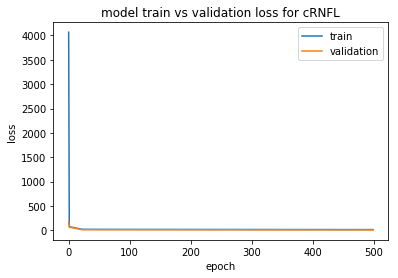

In [11]:
ANN_baseline(X, y_RNFL, 'cRNFL')

Train on 2072 samples, validate on 518 samples
Epoch 1/500
2072/2072 [==============================] - 1s 659us/step - loss: 3241.9067 - mean_absolute_error: 50.8588 - acc: 0.0029 - val_loss: 188.9456 - val_mean_absolute_error: 13.1880 - val_acc: 0.0019

Epoch 00001: val_loss improved from inf to 188.94557, saving model to ANN_Interval_best_GCIPL.hdf5
Epoch 2/500
2072/2072 [==============================] - 0s 79us/step - loss: 36.7634 - mean_absolute_error: 4.4397 - acc: 0.0936 - val_loss: 13.9833 - val_mean_absolute_error: 2.6533 - val_acc: 0.1351

Epoch 00002: val_loss improved from 188.94557 to 13.98330, saving model to ANN_Interval_best_GCIPL.hdf5
Epoch 3/500
2072/2072 [==============================] - 0s 81us/step - loss: 14.4259 - mean_absolute_error: 2.7364 - acc: 0.1385 - val_loss: 14.0699 - val_mean_absolute_error: 2.6696 - val_acc: 0.1429

Epoch 00003: val_loss did not improve from 13.98330
Epoch 4/500
2072/2072 [==============================] - 0s 78us/step - loss: 13.91

Epoch 28/500
2072/2072 [==============================] - 0s 83us/step - loss: 7.1115 - mean_absolute_error: 1.4756 - acc: 0.2867 - val_loss: 7.1744 - val_mean_absolute_error: 1.4748 - val_acc: 0.2568

Epoch 00028: val_loss improved from 7.18914 to 7.17443, saving model to ANN_Interval_best_GCIPL.hdf5
Epoch 29/500
2072/2072 [==============================] - 0s 79us/step - loss: 7.0809 - mean_absolute_error: 1.4672 - acc: 0.2901 - val_loss: 7.1647 - val_mean_absolute_error: 1.4671 - val_acc: 0.2664

Epoch 00029: val_loss improved from 7.17443 to 7.16470, saving model to ANN_Interval_best_GCIPL.hdf5
Epoch 30/500
2072/2072 [==============================] - 0s 82us/step - loss: 7.0545 - mean_absolute_error: 1.4599 - acc: 0.2920 - val_loss: 7.1571 - val_mean_absolute_error: 1.4602 - val_acc: 0.2780

Epoch 00030: val_loss improved from 7.16470 to 7.15710, saving model to ANN_Interval_best_GCIPL.hdf5
Epoch 31/500
2072/2072 [==============================] - 0s 80us/step - loss: 7.0325 - mea

Epoch 88/500
2072/2072 [==============================] - 0s 75us/step - loss: 6.9648 - mean_absolute_error: 1.5275 - acc: 0.2616 - val_loss: 7.0703 - val_mean_absolute_error: 1.3788 - val_acc: 0.3166

Epoch 00088: val_loss improved from 7.07601 to 7.07035, saving model to ANN_Interval_best_GCIPL.hdf5
Epoch 89/500
2072/2072 [==============================] - 0s 81us/step - loss: 6.9584 - mean_absolute_error: 1.5270 - acc: 0.2616 - val_loss: 7.0645 - val_mean_absolute_error: 1.3784 - val_acc: 0.3166

Epoch 00089: val_loss improved from 7.07035 to 7.06447, saving model to ANN_Interval_best_GCIPL.hdf5
Epoch 90/500
2072/2072 [==============================] - 0s 88us/step - loss: 6.9523 - mean_absolute_error: 1.5267 - acc: 0.2606 - val_loss: 7.0583 - val_mean_absolute_error: 1.3780 - val_acc: 0.3147

Epoch 00090: val_loss improved from 7.06447 to 7.05827, saving model to ANN_Interval_best_GCIPL.hdf5
Epoch 91/500
2072/2072 [==============================] - 0s 90us/step - loss: 6.9456 - mea

Epoch 115/500
2072/2072 [==============================] - 0s 79us/step - loss: 6.8215 - mean_absolute_error: 1.5159 - acc: 0.2606 - val_loss: 6.8956 - val_mean_absolute_error: 1.3685 - val_acc: 0.3127

Epoch 00115: val_loss improved from 6.90191 to 6.89558, saving model to ANN_Interval_best_GCIPL.hdf5
Epoch 116/500
2072/2072 [==============================] - 0s 79us/step - loss: 6.8170 - mean_absolute_error: 1.5153 - acc: 0.2592 - val_loss: 6.8892 - val_mean_absolute_error: 1.3682 - val_acc: 0.3127

Epoch 00116: val_loss improved from 6.89558 to 6.88917, saving model to ANN_Interval_best_GCIPL.hdf5
Epoch 117/500
2072/2072 [==============================] - 0s 75us/step - loss: 6.8136 - mean_absolute_error: 1.5151 - acc: 0.2592 - val_loss: 6.8828 - val_mean_absolute_error: 1.3678 - val_acc: 0.3108

Epoch 00117: val_loss improved from 6.88917 to 6.88284, saving model to ANN_Interval_best_GCIPL.hdf5
Epoch 118/500
2072/2072 [==============================] - 0s 76us/step - loss: 6.8098 -

Epoch 142/500
2072/2072 [==============================] - 0s 86us/step - loss: 6.7423 - mean_absolute_error: 1.5068 - acc: 0.2654 - val_loss: 6.7492 - val_mean_absolute_error: 1.3604 - val_acc: 0.3089

Epoch 00142: val_loss improved from 6.75370 to 6.74924, saving model to ANN_Interval_best_GCIPL.hdf5
Epoch 143/500
2072/2072 [==============================] - 0s 85us/step - loss: 6.7403 - mean_absolute_error: 1.5066 - acc: 0.2650 - val_loss: 6.7448 - val_mean_absolute_error: 1.3602 - val_acc: 0.3127

Epoch 00143: val_loss improved from 6.74924 to 6.74485, saving model to ANN_Interval_best_GCIPL.hdf5
Epoch 144/500
2072/2072 [==============================] - 0s 85us/step - loss: 6.7384 - mean_absolute_error: 1.5064 - acc: 0.2659 - val_loss: 6.7405 - val_mean_absolute_error: 1.3600 - val_acc: 0.3127

Epoch 00144: val_loss improved from 6.74485 to 6.74051, saving model to ANN_Interval_best_GCIPL.hdf5
Epoch 145/500
2072/2072 [==============================] - 0s 86us/step - loss: 6.7706 -

Epoch 169/500
2072/2072 [==============================] - 0s 90us/step - loss: 6.6965 - mean_absolute_error: 1.5011 - acc: 0.2650 - val_loss: 6.6480 - val_mean_absolute_error: 1.3557 - val_acc: 0.3205

Epoch 00169: val_loss improved from 6.65119 to 6.64798, saving model to ANN_Interval_best_GCIPL.hdf5
Epoch 170/500
2072/2072 [==============================] - 0s 73us/step - loss: 6.6952 - mean_absolute_error: 1.5010 - acc: 0.2659 - val_loss: 6.6448 - val_mean_absolute_error: 1.3556 - val_acc: 0.3185

Epoch 00170: val_loss improved from 6.64798 to 6.64479, saving model to ANN_Interval_best_GCIPL.hdf5
Epoch 171/500
2072/2072 [==============================] - 0s 89us/step - loss: 6.6936 - mean_absolute_error: 1.5008 - acc: 0.2669 - val_loss: 6.6416 - val_mean_absolute_error: 1.3554 - val_acc: 0.3205

Epoch 00171: val_loss improved from 6.64479 to 6.64165, saving model to ANN_Interval_best_GCIPL.hdf5
Epoch 172/500
2072/2072 [==============================] - 0s 77us/step - loss: 6.6923 -

Epoch 196/500
2072/2072 [==============================] - 0s 83us/step - loss: 6.6634 - mean_absolute_error: 1.4973 - acc: 0.2722 - val_loss: 6.5712 - val_mean_absolute_error: 1.3526 - val_acc: 0.3147

Epoch 00196: val_loss improved from 6.57373 to 6.57117, saving model to ANN_Interval_best_GCIPL.hdf5
Epoch 197/500
2072/2072 [==============================] - 0s 93us/step - loss: 6.6624 - mean_absolute_error: 1.4972 - acc: 0.2717 - val_loss: 6.5686 - val_mean_absolute_error: 1.3525 - val_acc: 0.3147

Epoch 00197: val_loss improved from 6.57117 to 6.56861, saving model to ANN_Interval_best_GCIPL.hdf5
Epoch 198/500
2072/2072 [==============================] - 0s 79us/step - loss: 6.6614 - mean_absolute_error: 1.4970 - acc: 0.2712 - val_loss: 6.5661 - val_mean_absolute_error: 1.3524 - val_acc: 0.3147

Epoch 00198: val_loss improved from 6.56861 to 6.56609, saving model to ANN_Interval_best_GCIPL.hdf5
Epoch 199/500
2072/2072 [==============================] - 0s 82us/step - loss: 6.6603 -

Epoch 223/500
2072/2072 [==============================] - 0s 85us/step - loss: 6.6378 - mean_absolute_error: 1.4947 - acc: 0.2712 - val_loss: 6.5090 - val_mean_absolute_error: 1.3503 - val_acc: 0.3166

Epoch 00223: val_loss improved from 6.51104 to 6.50903, saving model to ANN_Interval_best_GCIPL.hdf5
Epoch 224/500
2072/2072 [==============================] - 0s 85us/step - loss: 6.6369 - mean_absolute_error: 1.4946 - acc: 0.2712 - val_loss: 6.5069 - val_mean_absolute_error: 1.3502 - val_acc: 0.3166

Epoch 00224: val_loss improved from 6.50903 to 6.50694, saving model to ANN_Interval_best_GCIPL.hdf5
Epoch 225/500
2072/2072 [==============================] - 0s 86us/step - loss: 6.6361 - mean_absolute_error: 1.4945 - acc: 0.2712 - val_loss: 6.5049 - val_mean_absolute_error: 1.3502 - val_acc: 0.3166

Epoch 00225: val_loss improved from 6.50694 to 6.50487, saving model to ANN_Interval_best_GCIPL.hdf5
Epoch 226/500
2072/2072 [==============================] - 0s 81us/step - loss: 6.6352 -

Epoch 250/500
2072/2072 [==============================] - 0s 89us/step - loss: 6.6156 - mean_absolute_error: 1.4926 - acc: 0.2717 - val_loss: 6.4572 - val_mean_absolute_error: 1.3487 - val_acc: 0.3147

Epoch 00250: val_loss improved from 6.45901 to 6.45722, saving model to ANN_Interval_best_GCIPL.hdf5
Epoch 251/500
2072/2072 [==============================] - 0s 88us/step - loss: 6.6151 - mean_absolute_error: 1.4926 - acc: 0.2717 - val_loss: 6.4555 - val_mean_absolute_error: 1.3486 - val_acc: 0.3147

Epoch 00251: val_loss improved from 6.45722 to 6.45554, saving model to ANN_Interval_best_GCIPL.hdf5
Epoch 252/500
2072/2072 [==============================] - 0s 88us/step - loss: 6.6140 - mean_absolute_error: 1.4925 - acc: 0.2717 - val_loss: 6.4537 - val_mean_absolute_error: 1.3486 - val_acc: 0.3147

Epoch 00252: val_loss improved from 6.45554 to 6.45371, saving model to ANN_Interval_best_GCIPL.hdf5
Epoch 253/500
2072/2072 [==============================] - 0s 89us/step - loss: 6.6133 -

Epoch 277/500
2072/2072 [==============================] - 0s 165us/step - loss: 6.5949 - mean_absolute_error: 1.4908 - acc: 0.2708 - val_loss: 6.4131 - val_mean_absolute_error: 1.3475 - val_acc: 0.3205

Epoch 00277: val_loss improved from 6.41485 to 6.41313, saving model to ANN_Interval_best_GCIPL.hdf5
Epoch 278/500
2072/2072 [==============================] - 0s 140us/step - loss: 6.5953 - mean_absolute_error: 1.4910 - acc: 0.2708 - val_loss: 6.4118 - val_mean_absolute_error: 1.3475 - val_acc: 0.3224

Epoch 00278: val_loss improved from 6.41313 to 6.41175, saving model to ANN_Interval_best_GCIPL.hdf5
Epoch 279/500
2072/2072 [==============================] - 0s 77us/step - loss: 6.5946 - mean_absolute_error: 1.4910 - acc: 0.2708 - val_loss: 6.4103 - val_mean_absolute_error: 1.3474 - val_acc: 0.3224

Epoch 00279: val_loss improved from 6.41175 to 6.41027, saving model to ANN_Interval_best_GCIPL.hdf5
Epoch 280/500
2072/2072 [==============================] - 0s 80us/step - loss: 6.5940

Epoch 334/500
2072/2072 [==============================] - 0s 78us/step - loss: 6.5600 - mean_absolute_error: 1.4886 - acc: 0.2727 - val_loss: 6.3396 - val_mean_absolute_error: 1.3460 - val_acc: 0.3282

Epoch 00334: val_loss improved from 6.34064 to 6.33957, saving model to ANN_Interval_best_GCIPL.hdf5
Epoch 335/500
2072/2072 [==============================] - 0s 71us/step - loss: 6.5593 - mean_absolute_error: 1.4885 - acc: 0.2732 - val_loss: 6.3384 - val_mean_absolute_error: 1.3460 - val_acc: 0.3282

Epoch 00335: val_loss improved from 6.33957 to 6.33845, saving model to ANN_Interval_best_GCIPL.hdf5
Epoch 336/500
2072/2072 [==============================] - 0s 76us/step - loss: 6.5588 - mean_absolute_error: 1.4885 - acc: 0.2732 - val_loss: 6.3373 - val_mean_absolute_error: 1.3460 - val_acc: 0.3282

Epoch 00336: val_loss improved from 6.33845 to 6.33733, saving model to ANN_Interval_best_GCIPL.hdf5
Epoch 337/500
2072/2072 [==============================] - 0s 74us/step - loss: 6.5582 -

2072/2072 [==============================] - 0s 75us/step - loss: 6.4905 - mean_absolute_error: 1.4816 - acc: 0.2712 - val_loss: 6.2632 - val_mean_absolute_error: 1.3429 - val_acc: 0.3185

Epoch 00394: val_loss did not improve from 6.23312
Epoch 395/500
2072/2072 [==============================] - 0s 70us/step - loss: 6.4872 - mean_absolute_error: 1.4813 - acc: 0.2708 - val_loss: 6.2631 - val_mean_absolute_error: 1.3431 - val_acc: 0.3205

Epoch 00395: val_loss did not improve from 6.23312
Epoch 396/500
2072/2072 [==============================] - 0s 70us/step - loss: 6.4850 - mean_absolute_error: 1.4809 - acc: 0.2703 - val_loss: 6.2599 - val_mean_absolute_error: 1.3426 - val_acc: 0.3205

Epoch 00396: val_loss did not improve from 6.23312
Epoch 397/500
2072/2072 [==============================] - 0s 73us/step - loss: 6.4807 - mean_absolute_error: 1.4800 - acc: 0.2688 - val_loss: 6.2587 - val_mean_absolute_error: 1.3427 - val_acc: 0.3185

Epoch 00397: val_loss did not improve from 6.2331

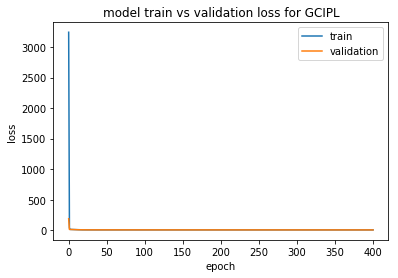

In [14]:
ANN_baseline(X, y_GCA, 'GCIPL')

Train on 2072 samples, validate on 518 samples
Epoch 1/500
2072/2072 [==============================] - 1s 605us/step - loss: 5518.9074 - mean_absolute_error: 65.8502 - acc: 0.0024 - val_loss: 507.3938 - val_mean_absolute_error: 20.8903 - val_acc: 0.0039

Epoch 00001: val_loss improved from inf to 507.39380, saving model to ANN_Interval_best_VFI.hdf5
Epoch 2/500
2072/2072 [==============================] - 0s 79us/step - loss: 213.1286 - mean_absolute_error: 10.4330 - acc: 0.0352 - val_loss: 173.1726 - val_mean_absolute_error: 8.7913 - val_acc: 0.0425

Epoch 00002: val_loss improved from 507.39380 to 173.17256, saving model to ANN_Interval_best_VFI.hdf5
Epoch 3/500
2072/2072 [==============================] - 0s 71us/step - loss: 161.0600 - mean_absolute_error: 8.5020 - acc: 0.0439 - val_loss: 167.9980 - val_mean_absolute_error: 8.8270 - val_acc: 0.0309

Epoch 00003: val_loss improved from 173.17256 to 167.99804, saving model to ANN_Interval_best_VFI.hdf5
Epoch 4/500
2072/2072 [=======

2072/2072 [==============================] - 0s 82us/step - loss: 28.5116 - mean_absolute_error: 3.1331 - acc: 0.1332 - val_loss: 37.4791 - val_mean_absolute_error: 3.9294 - val_acc: 0.0521

Epoch 00061: val_loss did not improve from 34.03159
Epoch 62/500
2072/2072 [==============================] - 0s 73us/step - loss: 28.5001 - mean_absolute_error: 3.1338 - acc: 0.1308 - val_loss: 37.4260 - val_mean_absolute_error: 3.9230 - val_acc: 0.0521

Epoch 00062: val_loss did not improve from 34.03159
Epoch 63/500
2072/2072 [==============================] - 0s 77us/step - loss: 28.4894 - mean_absolute_error: 3.1341 - acc: 0.1313 - val_loss: 37.3696 - val_mean_absolute_error: 3.9164 - val_acc: 0.0521

Epoch 00063: val_loss did not improve from 34.03159
Epoch 64/500
2072/2072 [==============================] - 0s 72us/step - loss: 28.4746 - mean_absolute_error: 3.1322 - acc: 0.1337 - val_loss: 37.3252 - val_mean_absolute_error: 3.9105 - val_acc: 0.0541

Epoch 00064: val_loss did not improve fro

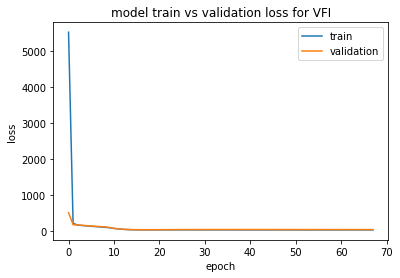

In [15]:
ANN_baseline(X, y_VFI, 'VFI')